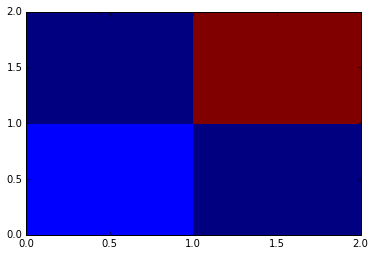

In [30]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

def update(P, C, R, x_hat, obs, I):
    """
    P: 誤差共分散行列
    C: 観測系数行列
    R: 観測ノイズ分散行列
    """
    #カルマンゲイン
    G = P * C / (C.T * P * C + R)
    x_hat = x_hat + G * (obs - C.T * x_hat)
    P = (I -  G * C.T) * P
    return x_hat, P

a = 2.
b = 5.

x = np.random.uniform(-5, 5, 365)
v = np.random.normal(0, 2, 365)
#v = [2.0*(1.-i/365.) for i in range(365)]
y = []
for i in range(365):
    y.append(a * x[i] + b + v[i])

A = np.mat([1])
P = np.mat([[1, 0], [0, 1]])
R = np.mat([1])
I = np.identity(2)
x_hat = np.mat([[0], [0]])

for i in range(365):
    C = np.mat([[x[i]], [1]])
    obs = np.mat([y[i]])
    x_hat, P = update(P, C, R, x_hat, obs, I)
    #plt.plot(i,x_hat[0], 'ko')
    #plt.plot(i,x_hat[1], 'go')


plt.pcolor(np.asarray(P))

[0]


ValueError: matrix must be 2-dimensional

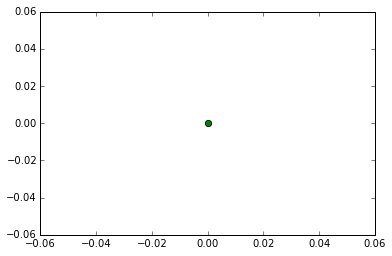

In [14]:
x = np.random.uniform(-5, 5, 365)
v = np.random.normal(0, 2, 365)
y = []

A = np.mat([1])
P = np.mat([[1, 0], [0, 1]])
R = np.mat([1])
I = np.identity(2)
x_hat = np.mat([[0], [0]])

for i in range(365):
    C = np.mat([[x[i]], [1]])
    obs = np.mat([y[i]])
    x_hat, P = update(P, C, R, x_hat, obs, I)
    y.append(x_hat[0] * x[i] + x_hat[1] + v[i])
    
    plt.plot(i,x_hat[0], 'ko')
    plt.plot(i,x_hat[1], 'go')